In [78]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
df=pd.read_csv('C:\\Users\\sandh\\OneDrive\\Desktop\\knn-file.csv')
df.drop(['Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df.tail(1)

,Name,Age,Income($)
21,Abdul,39,58000


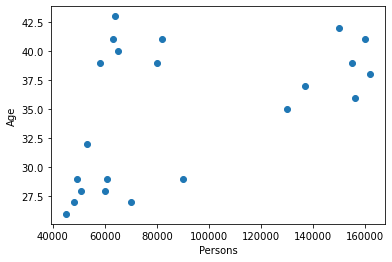

In [80]:
import matplotlib.pyplot as plt
plt.xlabel('Persons')
plt.ylabel('Age')
plt.scatter(df['Income($)'],df.Age)
plt.show()

In [81]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [82]:
y_predict=km.fit_predict(df[['Age','Income($)']])
df['Cluster']=y_predict
df.tail()

,Name,Age,Income($),Cluster
17,Priyanka,41,63000,2
18,Nick,43,64000,2
19,Alia,39,80000,0
20,Sid,41,82000,0
21,Abdul,39,58000,2


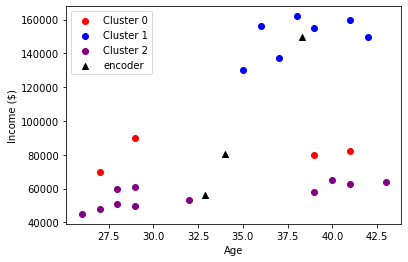

In [83]:
df0=df[df.Cluster==0]
df1=df[df.Cluster==1]
df2=df[df.Cluster==2]

plt.scatter(df0.Age,df0['Income($)'],color='red',label='Cluster 0')
plt.scatter(df1.Age,df1['Income($)'],color='blue',label='Cluster 1')
plt.scatter(df2.Age,df2['Income($)'],color='purple',label='Cluster 2')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='^',label='encoder')

plt.ylabel('Income ($)')
plt.xlabel('Age')

plt.legend()
plt.show()

In [85]:
scaler=MinMaxScaler()

# For Income Attribute
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])

# For Age Attribute
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])

df.head(1)

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0


In [93]:
# Again Permoing Clustering With New VAlues
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income($)']])
df['Cluster']=y_predicted

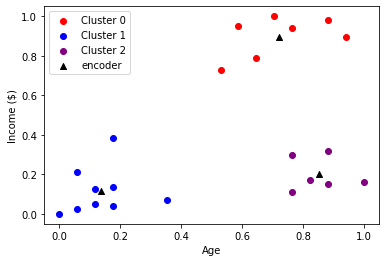

In [94]:
df0=df[df.Cluster==0]
df1=df[df.Cluster==1]
df2=df[df.Cluster==2]

plt.scatter(df0.Age,df0['Income($)'],color='red',label='Cluster 0')
plt.scatter(df1.Age,df1['Income($)'],color='blue',label='Cluster 1')
plt.scatter(df2.Age,df2['Income($)'],color='purple',label='Cluster 2')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='^',label='encoder')

plt.ylabel('Income ($)')
plt.xlabel('Age')

plt.legend()
plt.show()

In [101]:
# Finding Value Of K Using Elbow Method
sse=[]
for k in range(1,10):
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
sse

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.3491047094419565,
 0.2766936276300278,
 0.23431864372774677,
 0.17681044133887708,
 0.13265419827245162,
 0.10383752586603559]

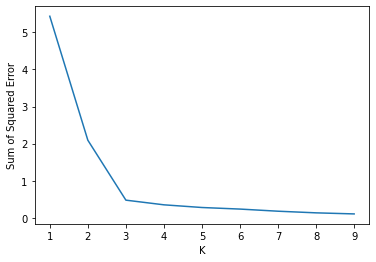

In [102]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(range(1,10),sse)